In [52]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN


In [2]:
list_of_tickers_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers = list_of_tickers_data.Symbol.to_list()

list_of_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


In [3]:
# 6 months worth of data
start = dt.datetime(2024,6,1)
end = dt.datetime(2024,12,1)

snp500 = yf.download(list_of_tickers, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-01 00:00:00 -> 2024-12-01 00:00:00)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Save a copy of S&P500

In [4]:
snp500.to_csv("snp_500.csv")

In [5]:
snp500 = snp500["Close"]

In [15]:
snp500_1 = snp500.copy()
snp500_1 = snp500_1.drop(columns=['BRK.B', 'BF.B'])

In [16]:
snp500_1.shape

(126, 501)

In [13]:
# Check for Null Values
snp500_1.isnull().sum().sort_values(ascending=False)

Ticker
SW      23
A        0
NEE      0
NVDA     0
NUE      0
        ..
EQR      0
EQIX     0
EPAM     0
EOG      0
ZTS      0
Length: 501, dtype: int64

In [18]:
snp500_1 = snp500_1.dropna(how='any')
snp500_1 = snp500_1.fillna(method="ffill")

C:\Users\lOvIn\AppData\Local\Temp\ipykernel_3660\2290948683.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  snp500_1 = snp500_1.fillna(method="ffill")


In [26]:
snp500_1_returns = snp500_1.pct_change().mean() * 252
snp500_1_returns

Ticker
A       0.259461
AAPL    0.128769
ABBV    0.318372
ABNB   -0.195734
ABT     0.416967
          ...   
XYL    -0.094435
YUM     0.230285
ZBH     0.166058
ZBRA    0.674569
ZTS     0.033761
Length: 501, dtype: float64

In [27]:
snp500_1_vol = snp500_1.pct_change().std() * np.sqrt(252)
snp500_1_vol

Ticker
A       0.257167
AAPL    0.210814
ABBV    0.291982
ABNB    0.385890
ABT     0.195145
          ...   
XYL     0.246717
YUM     0.169145
ZBH     0.249927
ZBRA    0.272115
ZTS     0.223132
Length: 501, dtype: float64

In [28]:
snp500_1_df = pd.DataFrame({"returns":snp500_1_returns,
                           "volatility":snp500_1_vol}) 

In [29]:
snp500_1_df

,returns,volatility
Ticker,,
A,0.259461,0.257167
AAPL,0.128769,0.210814
ABBV,0.318372,0.291982
ABNB,-0.195734,0.385890
ABT,0.416967,0.195145
...,...,...
XYL,-0.094435,0.246717
YUM,0.230285,0.169145
ZBH,0.166058,0.249927


In [39]:
scaler = StandardScaler()
X = snp500_1_df
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.23963308, -0.30808973],
       [-0.5175021 , -0.70429172],
       [-0.11438002, -0.01050917],
       ...,
       [-0.43822013, -0.3699755 ],
       [ 0.64294603, -0.18031884],
       [-0.71950257, -0.59900531]])

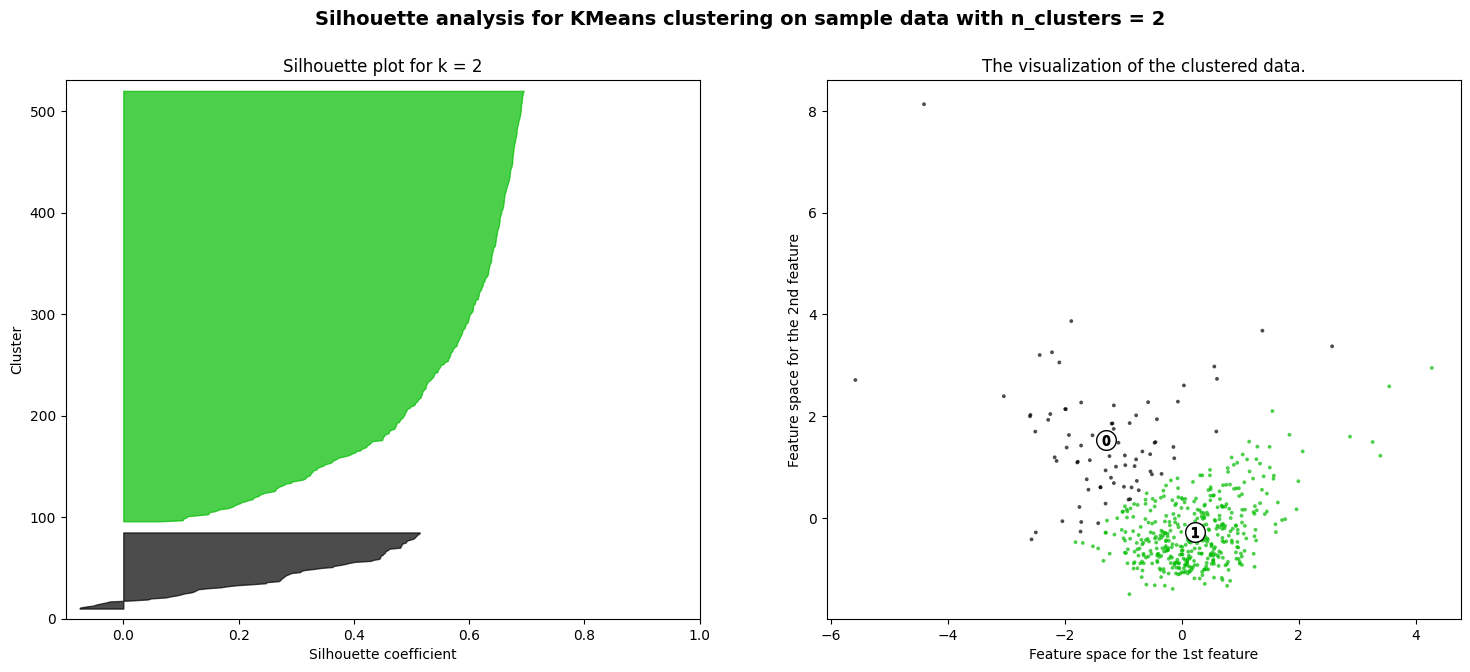

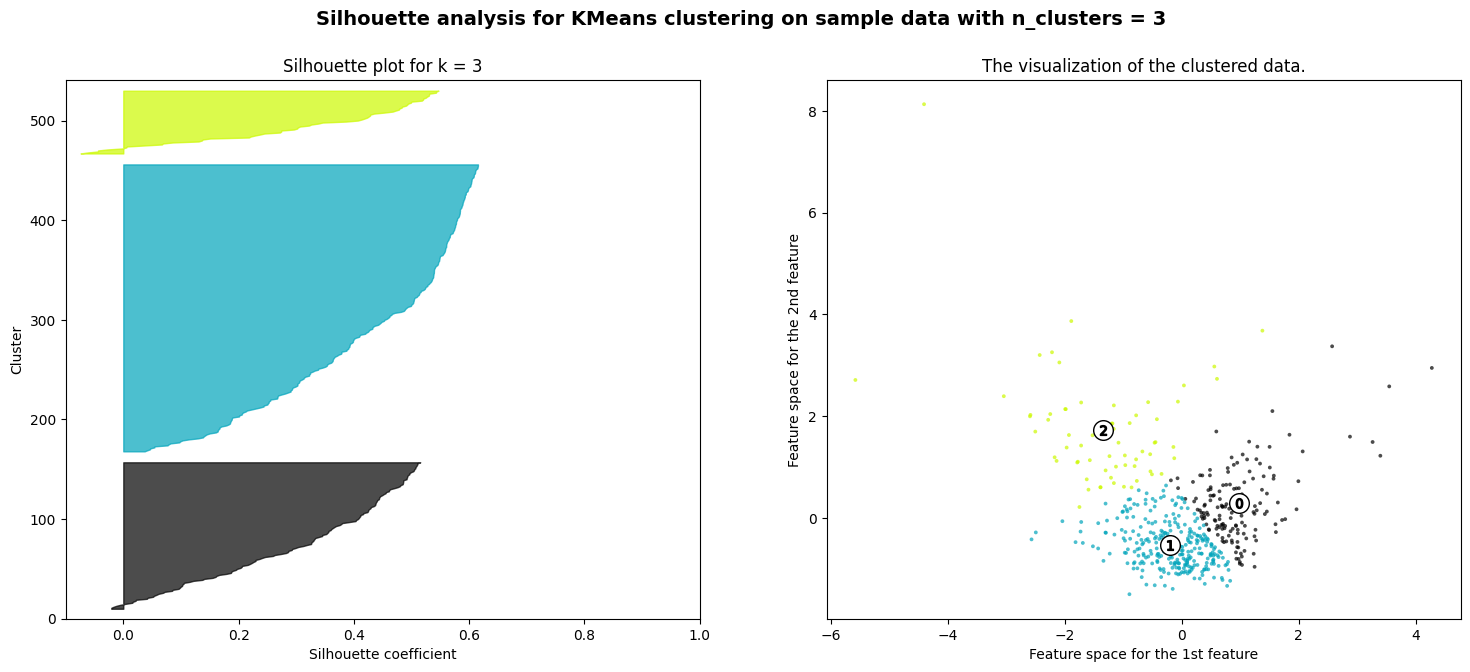

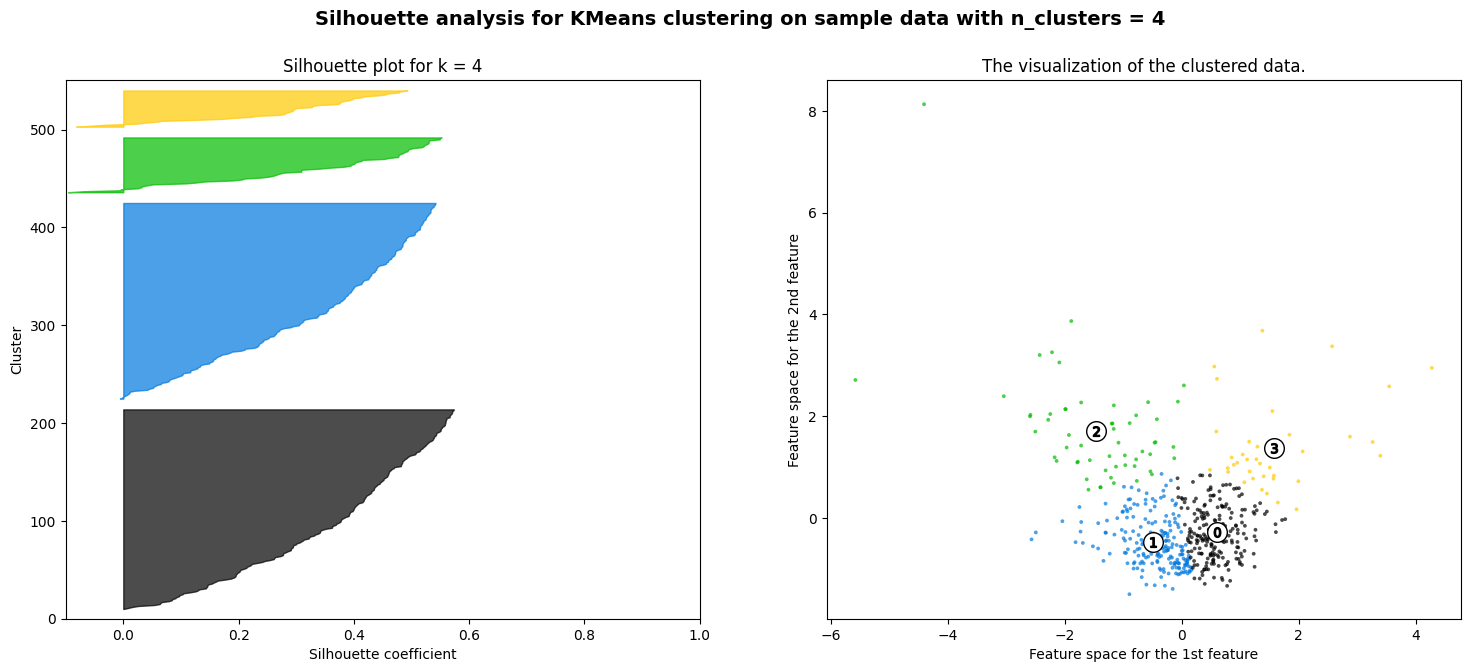

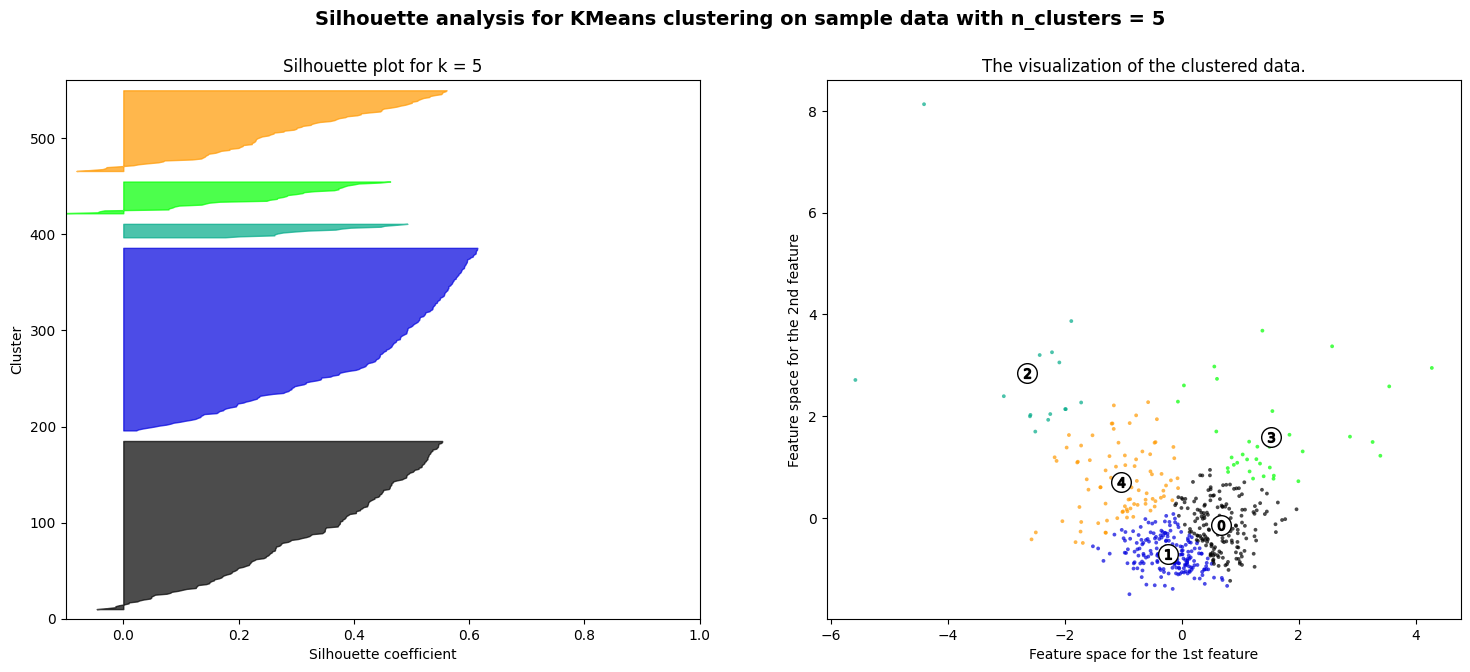

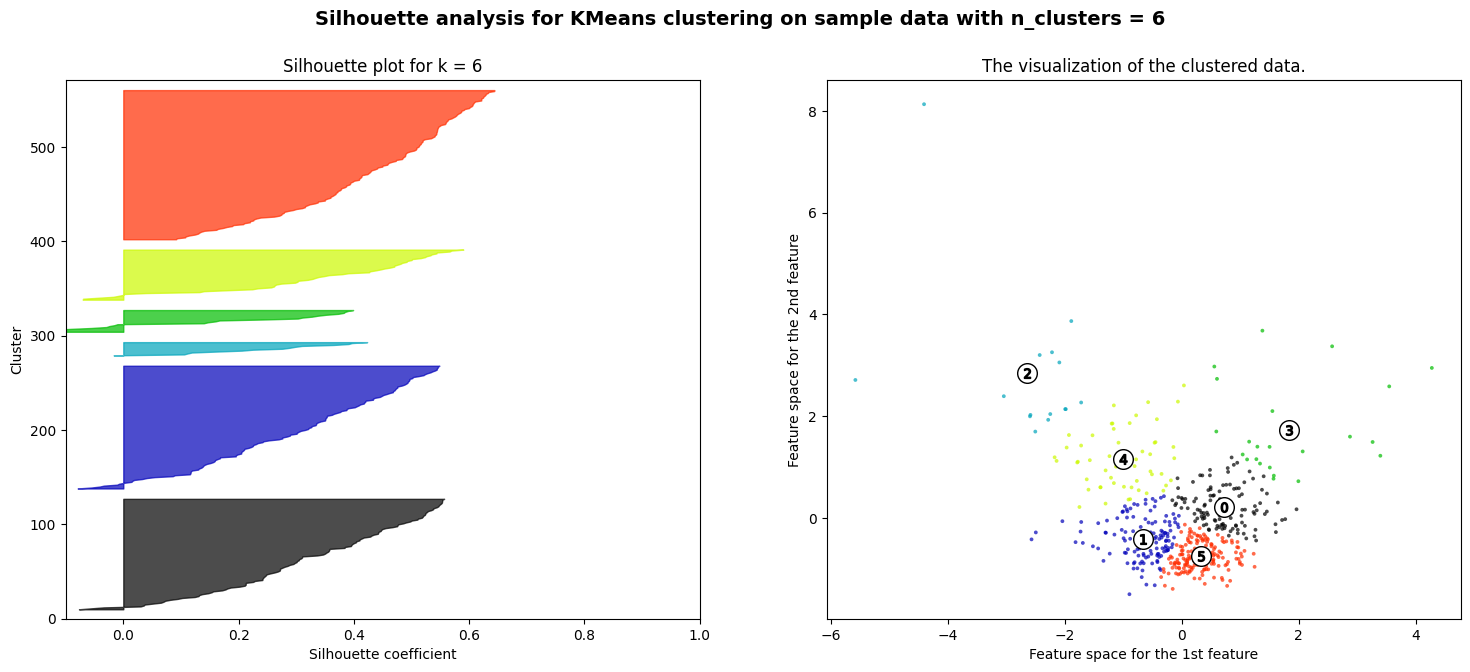

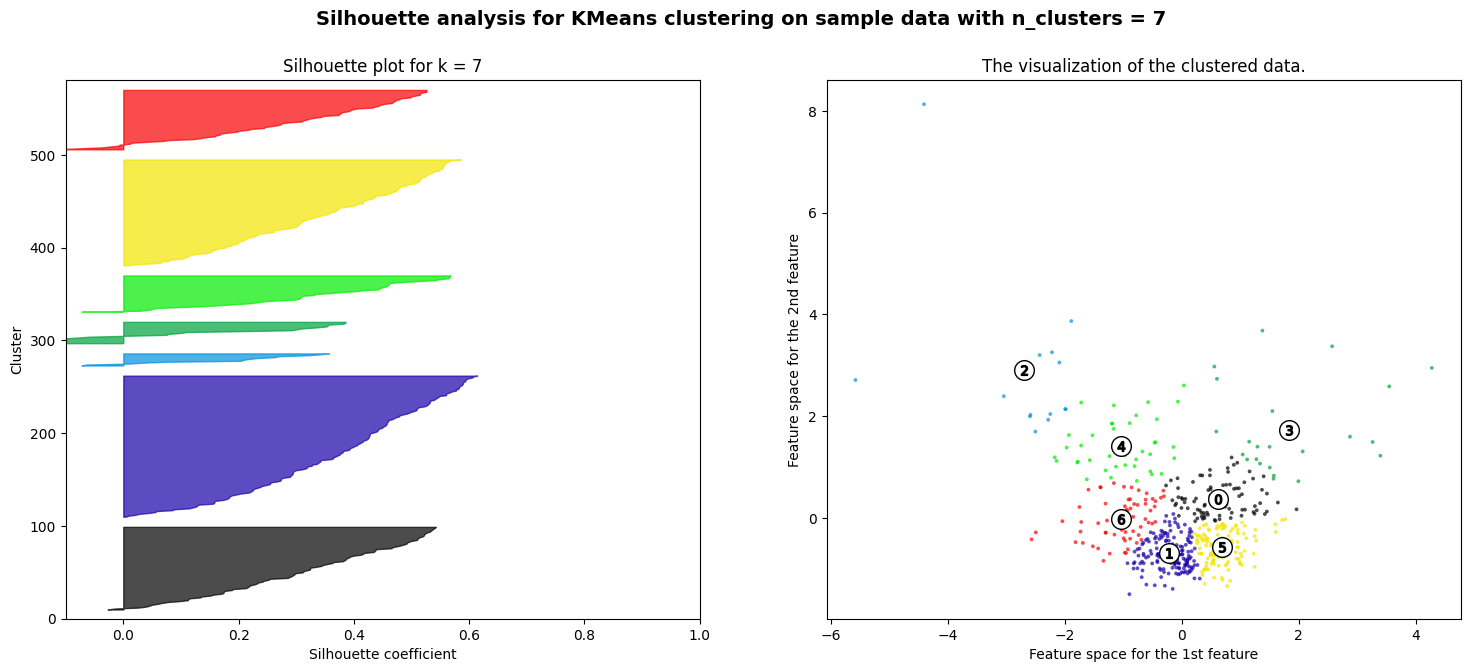

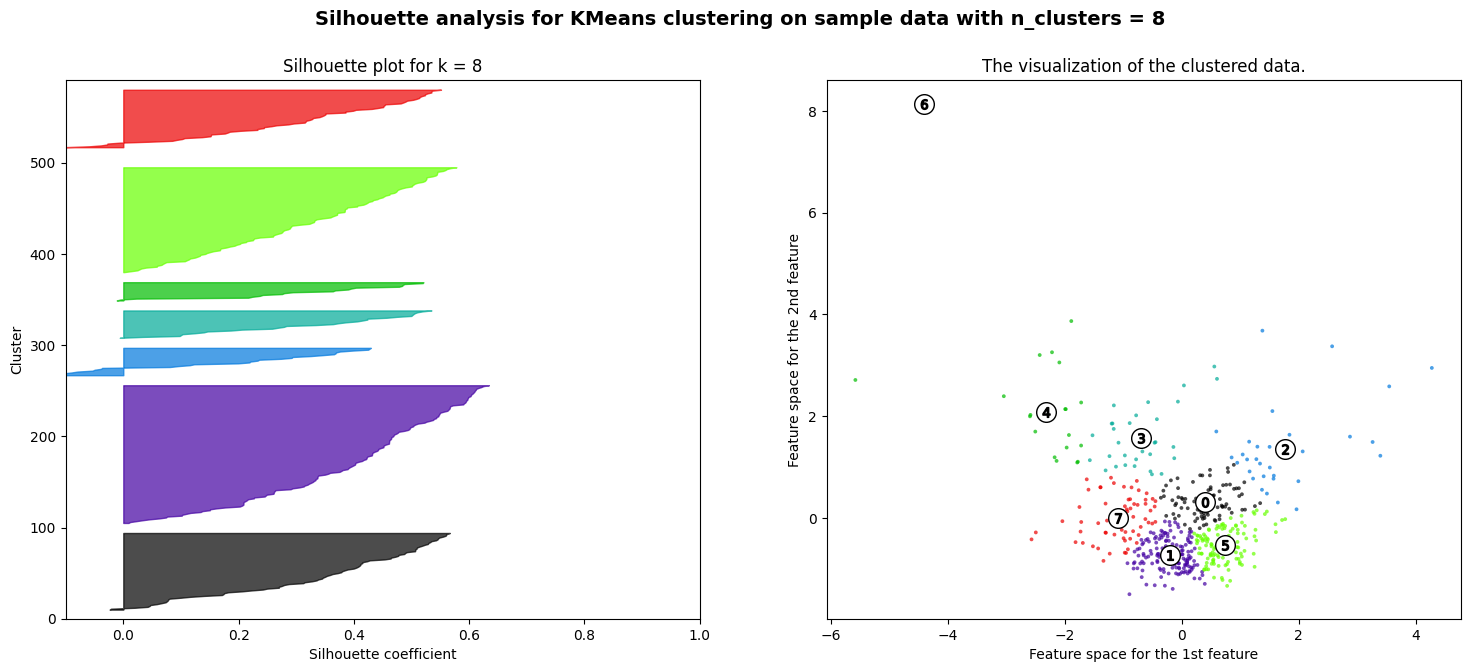

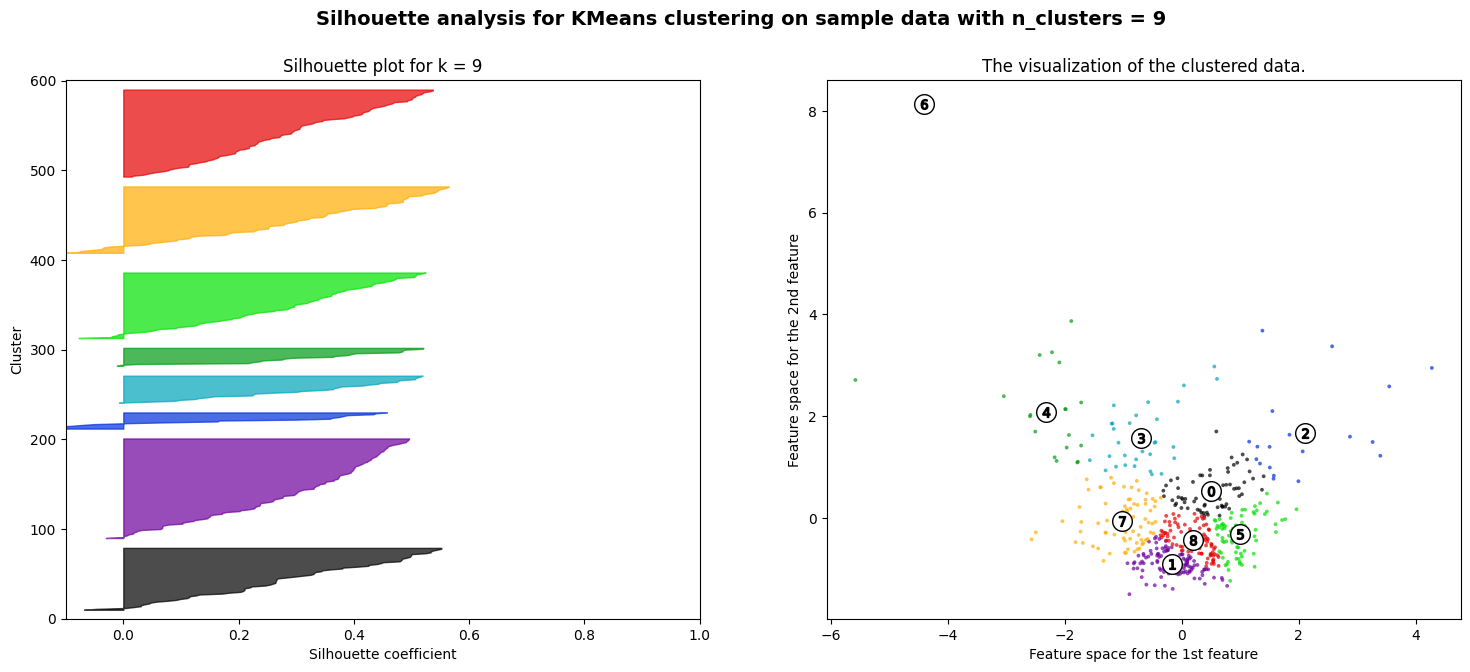

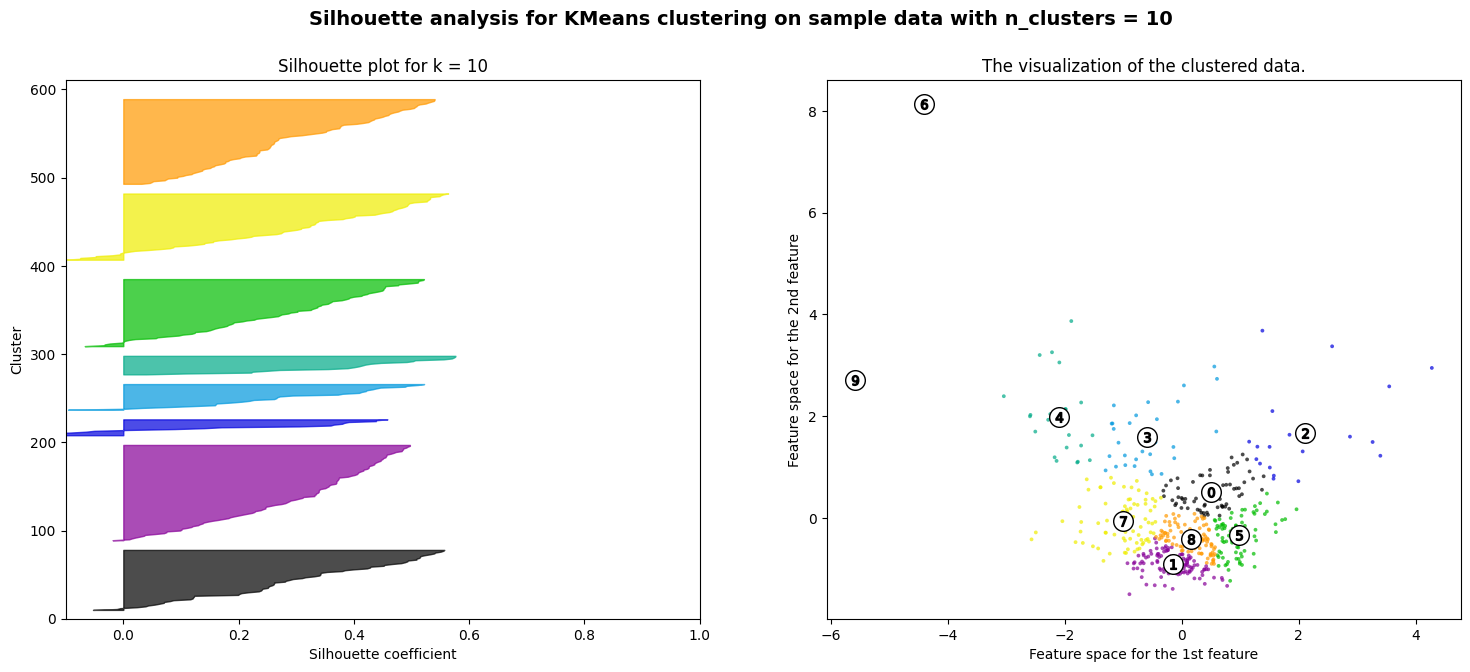

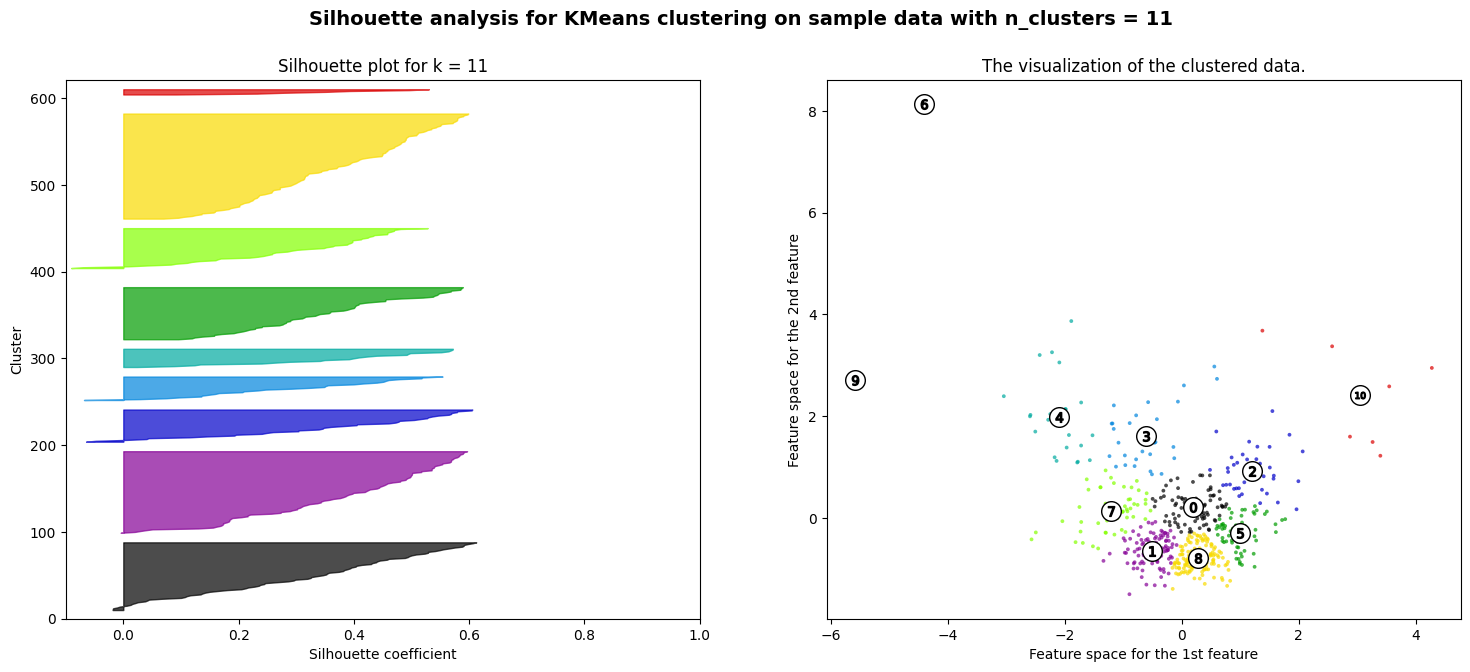

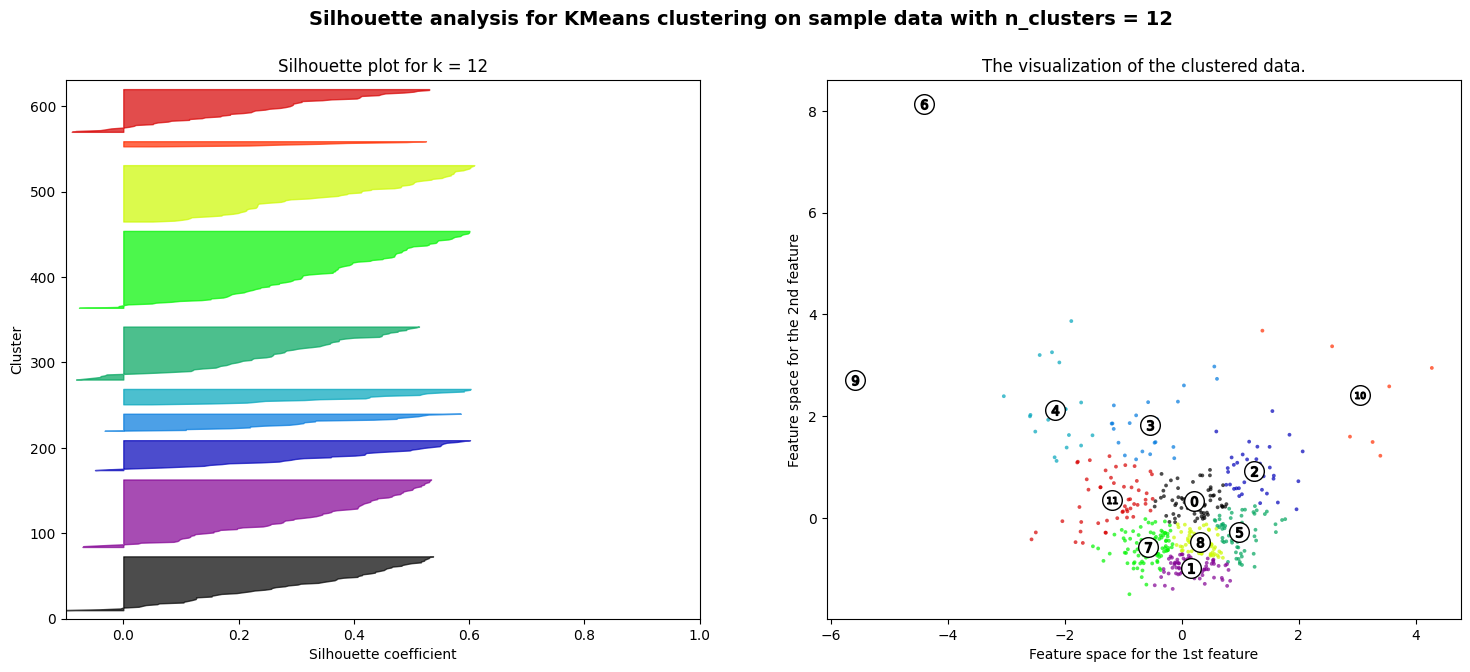

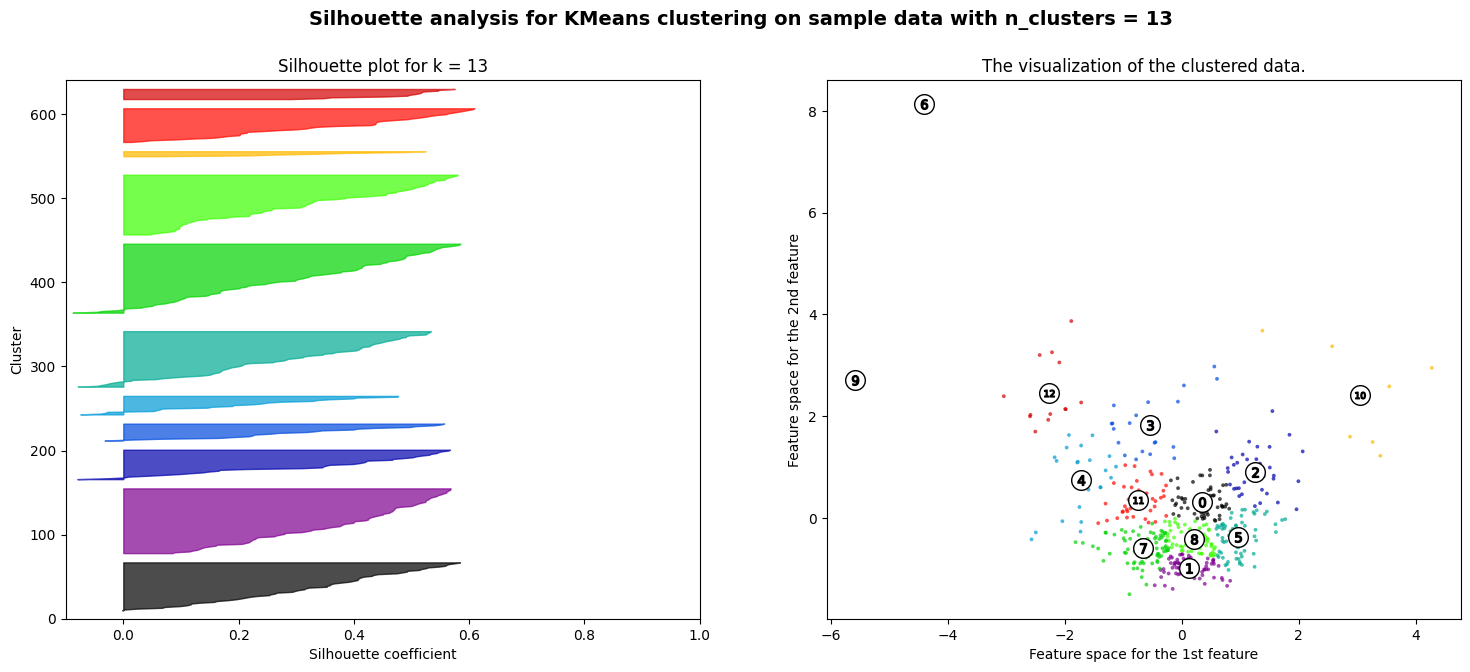

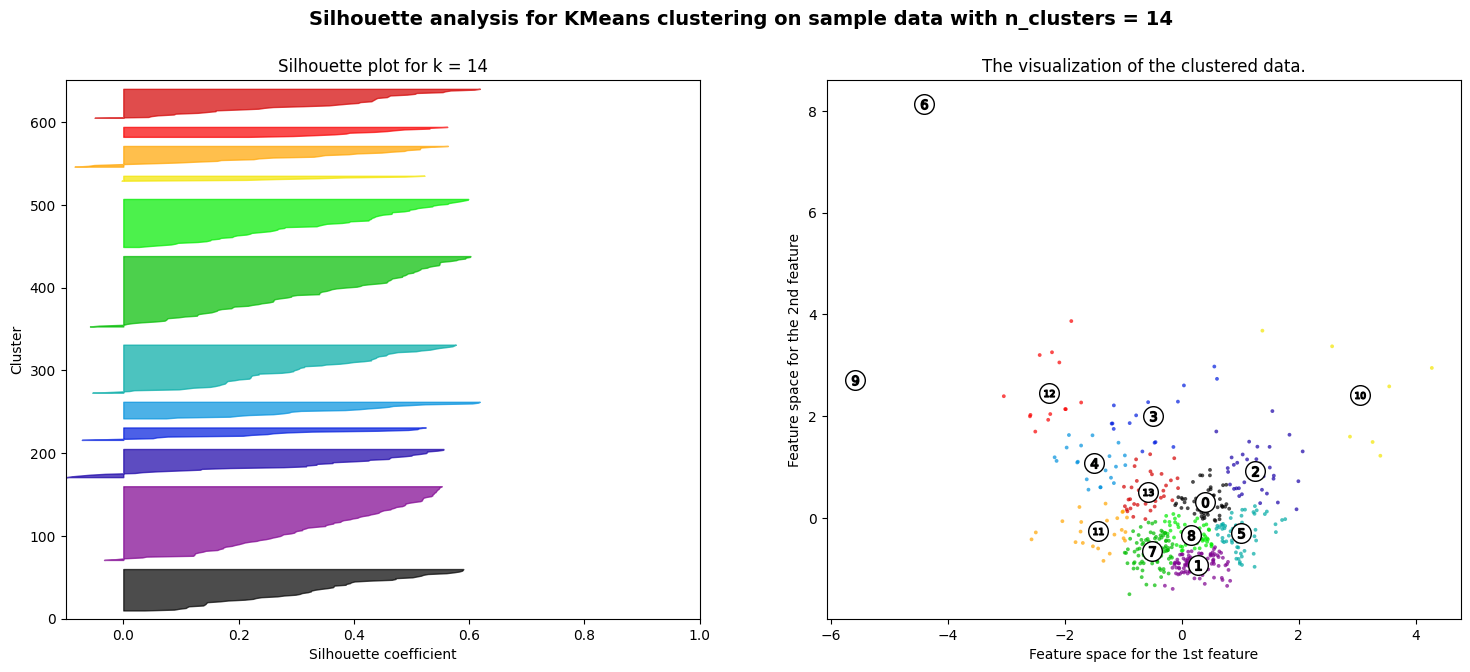

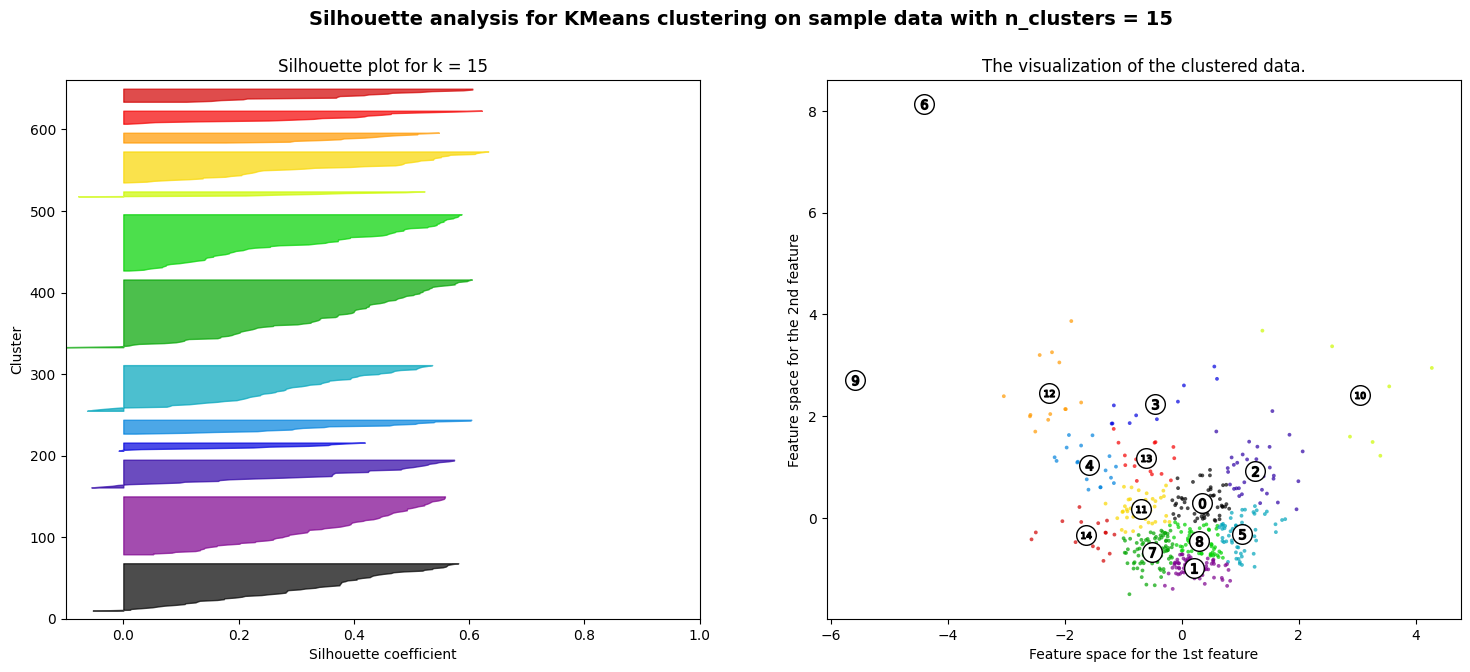

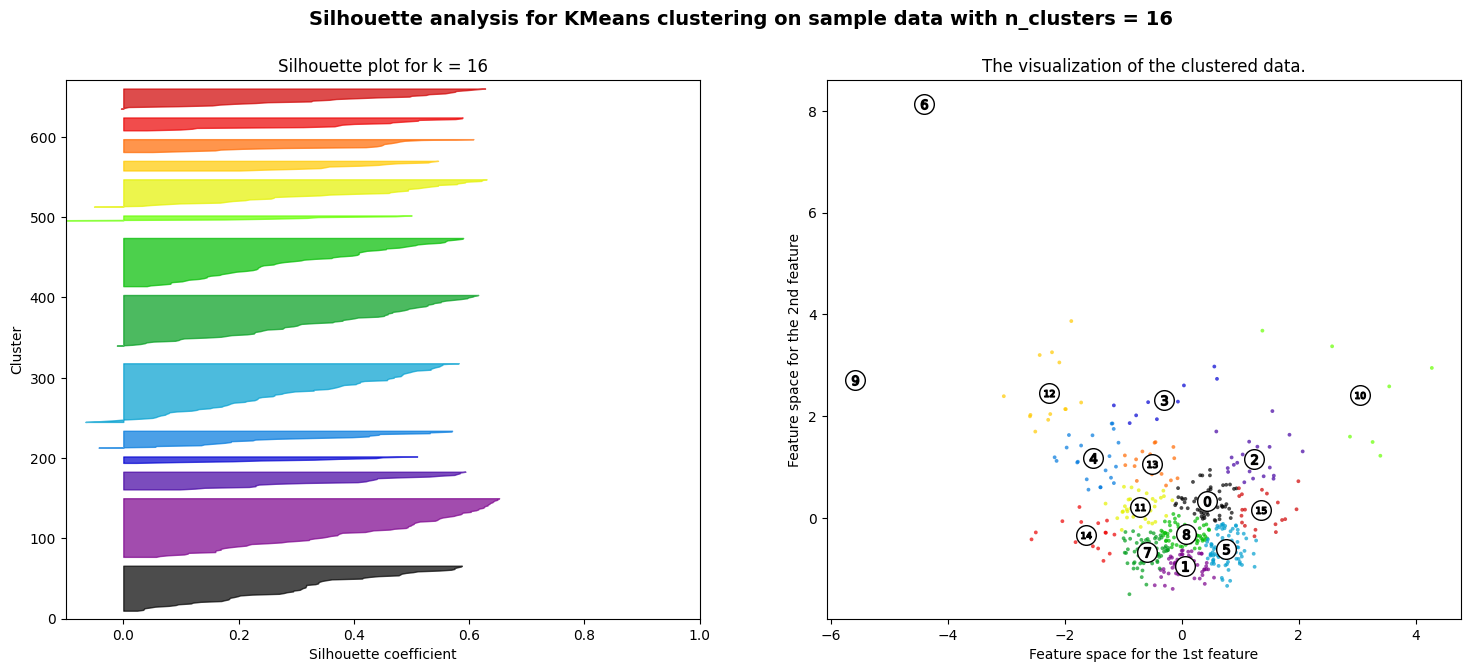

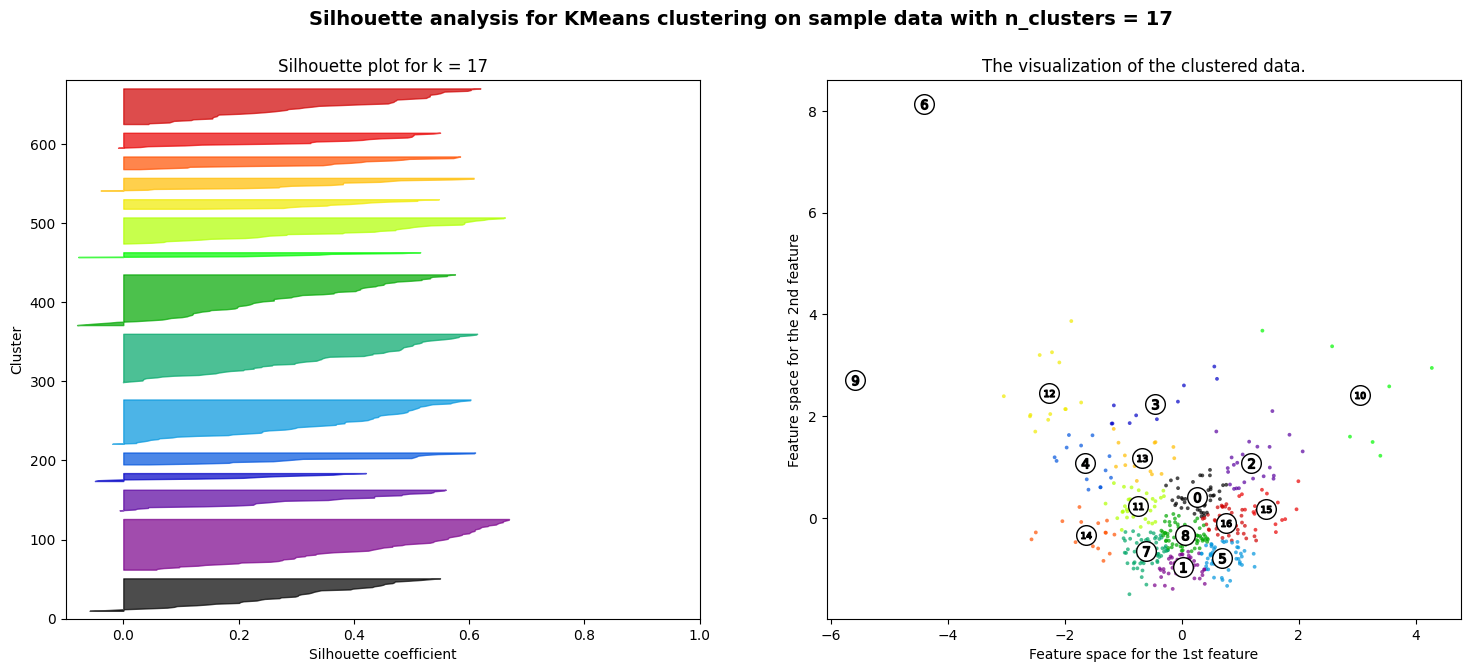

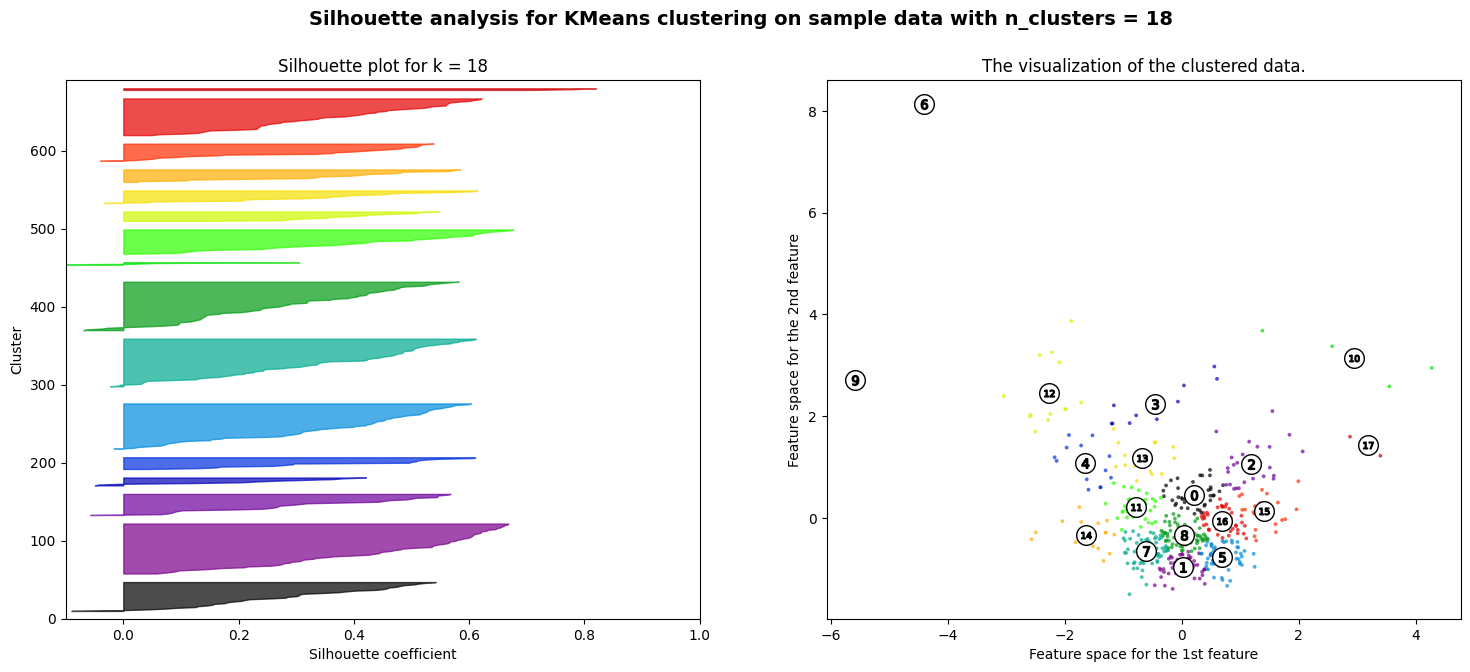

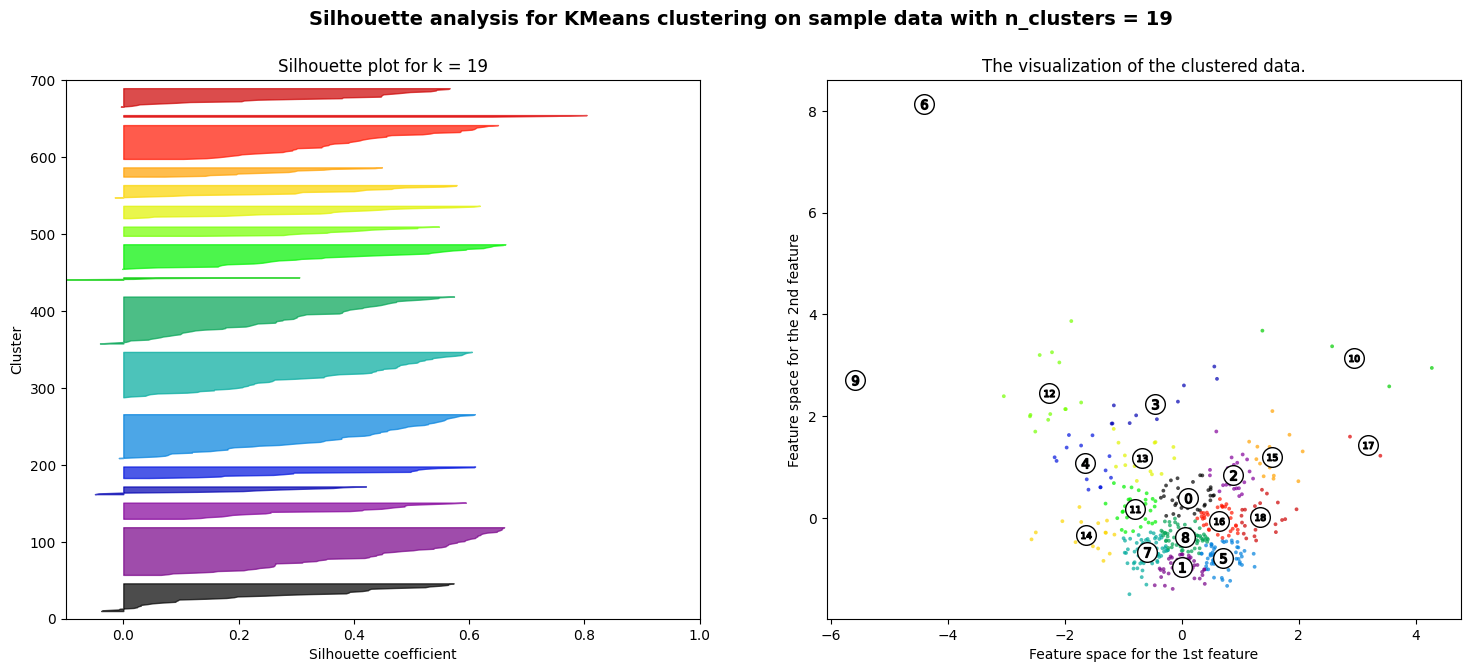

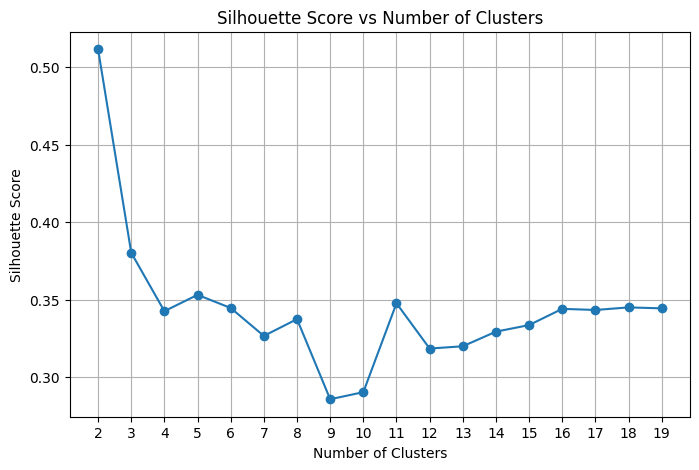

In [79]:
from matplotlib import cm

silhouette_scores = []
range_n_clusters = range(2, 20)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    score = metrics.silhouette_score(X_scaled, cluster_labels, random_state=627)
    # To plot Silhouette scores graph
    silhouette_scores.append(score)

    sample_silhouette_values = metrics.silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        y_lower = y_upper + 10  # 10 for spacing

    ax1.set_title(f"Silhouette plot for k = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
# Plot silhouette scores across cluster counts
plt.figure(figsize=(8, 5))
plt.xticks(np.linspace(0,20,21))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [80]:
kmeans = KMeans(n_clusters=6, n_init="auto", random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

clustered_stocks = pd.DataFrame({
    'stock':X.index,
    'cluster':kmeans.labels_
})
for cluster, group in clustered_stocks.groupby("cluster"):
    print(f"\nCluster {cluster}:")
    print(group['stock'].tolist())


Cluster 0:
['AMP', 'APD', 'AXP', 'BKNG', 'BKR', 'BMY', 'BX', 'BXP', 'C', 'CARR', 'CAT', 'CBRE', 'CF', 'CFG', 'CHRW', 'CMI', 'COF', 'CPAY', 'CRM', 'DAL', 'DASH', 'DE', 'DECK', 'DHI', 'DLR', 'DRI', 'DVA', 'EMR', 'EPAM', 'EQT', 'ERIE', 'ETN', 'ETR', 'EXPE', 'FAST', 'FFIV', 'FICO', 'FITB', 'GDDY', 'GE', 'GM', 'GNRC', 'GPN', 'GRMN', 'GS', 'HBAN', 'HSIC', 'HUBB', 'HWM', 'INCY', 'IP', 'IRM', 'ISRG', 'IVZ', 'JBHT', 'JBL', 'JCI', 'JPM', 'K', 'KEY', 'KEYS', 'KKR', 'KMX', 'KVUE', 'LDOS', 'LEN', 'LII', 'LUV', 'LVS', 'LYV', 'MKTX', 'MMM', 'MS', 'MTB', 'NFLX', 'NOW', 'NRG', 'NSC', 'ODFL', 'OKE', 'ORCL', 'PANW', 'PCAR', 'PH', 'PHM', 'PNC', 'PNR', 'PODD', 'POOL', 'PWR', 'PYPL', 'RF', 'RJF', 'RL', 'RMD', 'ROK', 'SCHW', 'SNA', 'SOLV', 'STLD', 'SW', 'SWK', 'TFC', 'TKO', 'TRGP', 'TRMB', 'TRV', 'UHS', 'UNH', 'URI', 'USB', 'VMC', 'VTRS', 'WAT', 'WDAY', 'WFC', 'WYNN', 'ZBRA']

Cluster 1:
['A', 'AAPL', 'ABBV', 'ACGL', 'ADBE', 'ADM', 'AIG', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AOS', 'APH', 'ARE', 'AVY', 'AWK', 'BA